Plot gradient fields and Jacobians that were generated by lya_fields.py.

In [1]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

# Load in data

In [2]:
# dimensions of each tf-derived field
shape = [1, 1, 1024]
# string representing the subsection's dimensions, e.g. '4x4x4'
dims_str = str(shape[0]) + 'x' + str(shape[1]) + 'x' + str(shape[2])

device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    dims_str += 'gpu'

# the fields computed by lya_fields.py
tf_path = "results/tf_fields" + dims_str + ".h5"

h5_tf = h5py.File(tf_path,'r')

In [3]:
h5_tf.keys()

<KeysViewHDF5 ['n_gradients', 'nhi', 'tau_jacobians', 'tau_real', 'tau_red']>

In [5]:
#dn_dr = h5_tf['n_gradients']['dn_dr']
#dn_dt = h5_tf['n_gradients']['dn_dt']

dtreal_dr_j = tf.squeeze(h5_tf['tau_jacobians']['dtreal_drho'])
dtred_dr_j = tf.squeeze(h5_tf['tau_jacobians']['dtred_drho'])
dtreal_dt_j = tf.squeeze(h5_tf['tau_jacobians']['dtreal_dt'])
dtred_dt_j = tf.squeeze(h5_tf['tau_jacobians']['dtred_dt'])

# Gradients of $n$

In [ ]:
# ...

# Jacobians of $\tau$

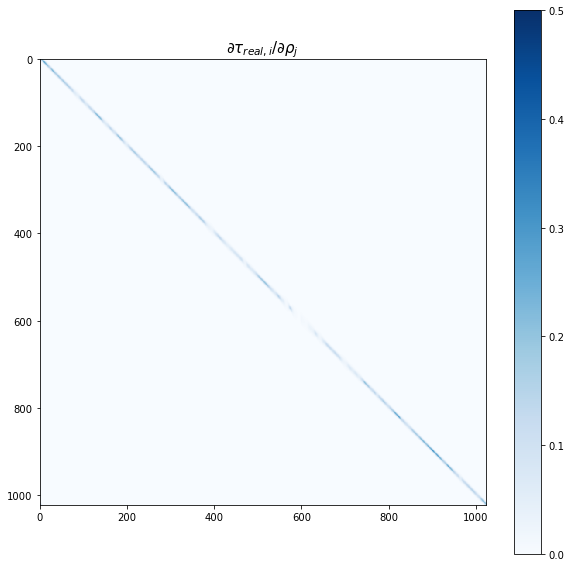

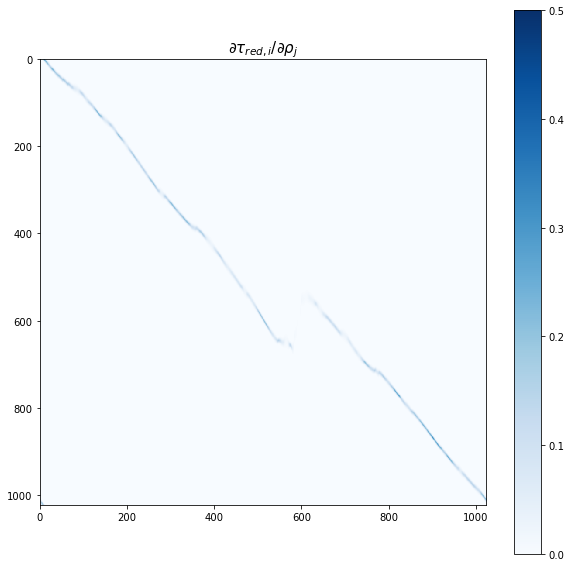

In [9]:
figsize=(10,10)

vmin_r = 0
vmax_r = 0.5

fig = plt.figure(figsize=figsize)
plt.imshow(dtreal_dr_j[:,:], cmap='Blues', vmin=vmin_r, vmax=vmax_r)
plt.colorbar()
plt.title(r'$\partial \tau_{real, i} / \partial \rho_j$', fontsize=15)
plt.show()

fig = plt.figure(figsize=figsize)
plt.imshow(dtred_dr_j[:,:], cmap='Blues', vmin=vmin_r, vmax=vmax_r)
plt.colorbar()
plt.title(r'$\partial \tau_{red, i} / \partial \rho_j$', fontsize=15)
plt.show()

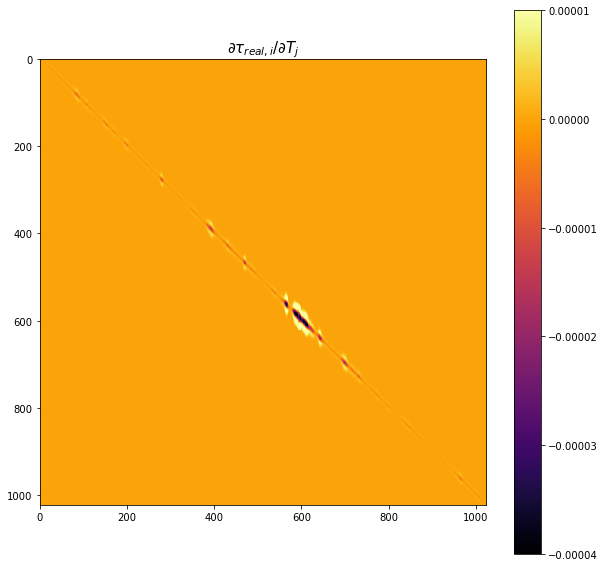

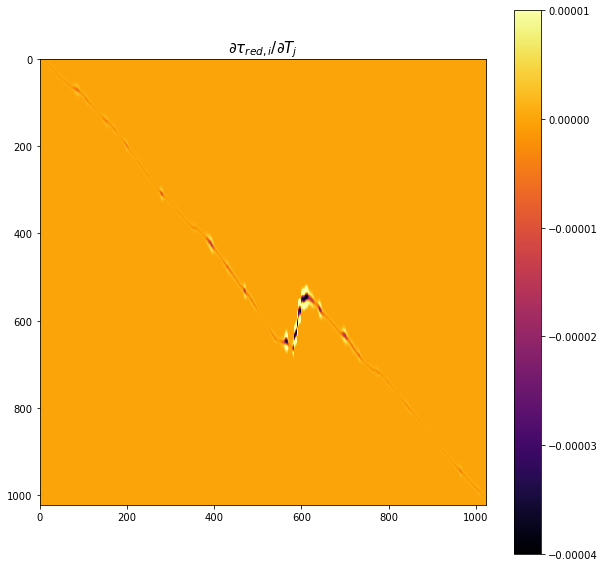

In [20]:
vmin_t = -4e-5
vmax_t = 1e-5

fig = plt.figure(figsize=figsize)
plt.imshow(dtreal_dt_j[:,:], cmap='inferno', vmin=vmin_t, vmax=vmax_t)
plt.colorbar()
plt.title(r'$\partial \tau_{real, i} / \partial T_j$', fontsize=15)
plt.show()

fig = plt.figure(figsize=figsize)
plt.imshow(dtred_dt_j[:,:], cmap='inferno', vmin=vmin_t, vmax=vmax_t)
plt.colorbar()
plt.title(r'$\partial \tau_{red, i} / \partial T_j$', fontsize=15)
plt.show()

# Close files

In [21]:
h5_tf.close()